In [1]:
from matplotlib import pyplot as plt
import numpy as np
import daft
from dw_tools import draw_tree

In [2]:
plt.rcParams.update({'font.size': 14})
%load_ext autoreload
%autoreload 2

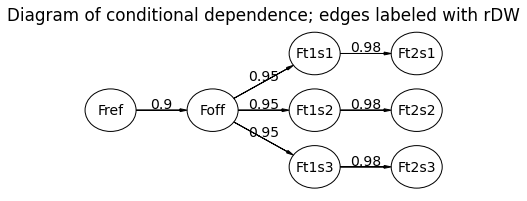

In [6]:
(r, rx, rt)   = (0.9, 0.95, 0.98)
root          = 0 # root of the DAG
node_labels = ["Fref", "Foff", "Ft1s1", "Ft2s1", "Ft1s2", "Ft2s2", "Ft1s3", "Ft2s3"]
n_nodes       = len(node_labels)
nodes = range(n_nodes)
edges = [(0,1),(1,2),(2,3),(1,4),(4,5),(1,6),(6,7)]
labeled_edges = [(node_labels[edges[e][0]], node_labels[edges[e][1]]) for e in range(len(edges))]
list_of_rdw   = [r,    rx,   rt,   rx,   rt,   rx,   rt]

pgm = draw_tree.prepare_tree_pgm(nodes, edges, node_labels, list_of_rdw, root)
pgm.render()
plt.title(f"Diagram of conditional dependence; edges labeled with rDW")
plt.show()

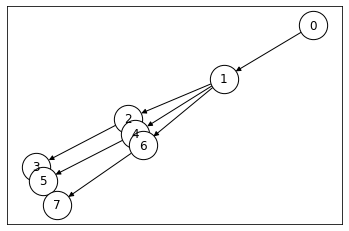

In [46]:
import networkx as nx

G=nx.DiGraph()
G.add_nodes_from(list_of_nodes)                            
G.add_edges_from(list_of_edges)
# pos = nx.spring_layout(G, k=0.3, iterations=20)
# pos = nx.draw_shell(G, arrows=True,node_color='w', edgecolors='k',node_size=800 )
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx(G, pos, arrows=True,node_color='w', edgecolors='k',node_size=800 )
plt.show()

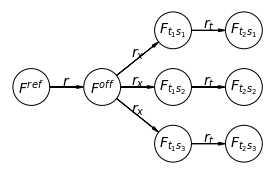

In [42]:
# 
pgm_1 = daft.PGM(label_params={'fontsize':14})
dh_add_node(pgm_1, "Fref",      r"$F^{ref}$",     2,1)
dh_add_node(pgm_1, "Foff",      r"$F^{off}$",     2,2)
dh_add_node(pgm_1, "Fon_t1_s1", r"$F_{t_1 s_1}$", 1,3)
dh_add_node(pgm_1, "Fon_t2_s1", r"$F_{t_2 s_1}$", 1,4)
dh_add_node(pgm_1, "Fon_t1_s2", r"$F_{t_1 s_2}$", 2,3)
dh_add_node(pgm_1, "Fon_t2_s2", r"$F_{t_2 s_2}$", 2,4)
dh_add_node(pgm_1, "Fon_t1_s3", r"$F_{t_1 s_3}$", 3,3)
dh_add_node(pgm_1, "Fon_t2_s3", r"$F_{t_2 s_3}$", 3,4)

pgm_1.add_edge("Fref", "Foff"    ,       label=r"$r$",   label_params={'fontsize':14})
pgm_1.add_edge("Foff", "Fon_t1_s1",      label=r"$r_x$", label_params={'fontsize':14})
pgm_1.add_edge("Foff", "Fon_t1_s2",      label=r"$r_x$", label_params={'fontsize':14})
pgm_1.add_edge("Foff", "Fon_t1_s3",      label=r"$r_x$", label_params={'fontsize':14})
pgm_1.add_edge("Fon_t1_s1", "Fon_t2_s1", label=r"$r_t$", label_params={'fontsize':14})
pgm_1.add_edge("Fon_t1_s2", "Fon_t2_s2", label=r"$r_t$", label_params={'fontsize':14})
pgm_1.add_edge("Fon_t1_s3", "Fon_t2_s3", label=r"$r_t$", label_params={'fontsize':14})

pgm_1.render()
plt.show()

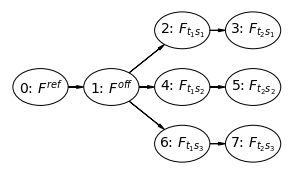

In [31]:
# 
pgm_1 = daft.PGM(label_params={'fontsize':14})
dh_add_node(pgm_1, "Fref",      r"0: $F^{ref}$",     2,1,aspect=1.5)
dh_add_node(pgm_1, "Foff",      r"1: $F^{off}$",     2,2,aspect=1.5)
dh_add_node(pgm_1, "Fon_t1_s1", r"2: $F_{t_1 s_1}$", 1,3,aspect=1.5)
dh_add_node(pgm_1, "Fon_t2_s1", r"3: $F_{t_2 s_1}$", 1,4,aspect=1.5)
dh_add_node(pgm_1, "Fon_t1_s2", r"4: $F_{t_1 s_2}$", 2,3,aspect=1.5)
dh_add_node(pgm_1, "Fon_t2_s2", r"5: $F_{t_2 s_2}$", 2,4,aspect=1.5)
dh_add_node(pgm_1, "Fon_t1_s3", r"6: $F_{t_1 s_3}$", 3,3,aspect=1.5)
dh_add_node(pgm_1, "Fon_t2_s3", r"7: $F_{t_2 s_3}$", 3,4,aspect=1.5)

pgm_1.add_edge("Fref", "Foff")
pgm_1.add_edge("Foff", "Fon_t1_s1")
pgm_1.add_edge("Foff", "Fon_t1_s2")
pgm_1.add_edge("Foff", "Fon_t1_s3")
pgm_1.add_edge("Fon_t1_s1", "Fon_t2_s1")
pgm_1.add_edge("Fon_t1_s2", "Fon_t2_s2")
pgm_1.add_edge("Fon_t1_s3", "Fon_t2_s3")

pgm_1.render()
plt.show()

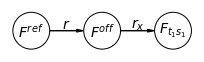

In [43]:
pgm_1 = daft.PGM(label_params={'fontsize':14})
dh_add_node(pgm_1, "Fref", r"$F^{ref}$",     1,1)
dh_add_node(pgm_1, "Foff", r"$F^{off}$",     1,2)
dh_add_node(pgm_1, "Fon",  r"$F_{t_1 s_1}$", 1,3)

pgm_1.add_edge("Fref", "Foff",  label=r"$r$",   label_params={'fontsize':14})
pgm_1.add_edge("Foff", "Fon" ,  label=r"$r_x$", label_params={'fontsize':14})

pgm_1.render()
plt.show()

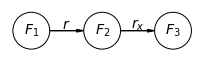

In [45]:
pgm_1 = daft.PGM(label_params={'fontsize':14})
dh_add_node(pgm_1, "F1", r"$F_1$", 1,1)
dh_add_node(pgm_1, "F2", r"$F_2$", 1,2)
dh_add_node(pgm_1, "F3", r"$F_3$", 1,3)

pgm_1.add_edge("F1", "F2",  label=r"$r$",   label_params={'fontsize':14})
pgm_1.add_edge("F2", "F3",  label=r"$r_x$", label_params={'fontsize':14})

pgm_1.render()
plt.show()